In [2]:

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score
# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv("./20202021data.csv", encoding = "euc-kr")

df = df[['상장유지년도_2020(X1)', '2020 배당성향(X3)', '2020 배당률(X4)',
       '당기순손실여부_2020(X5)', '주당순이익감소여부_2020(X6)', '유동비율_전기(X7)', '부채비율_전기(X8)',
       '총자산증가율_전기(X10)', '매출액증가율_전기(X11)', '매출액순이익률_전기(X12)',
       '총자본영업이익률_전기(X13)', '자기자본순이익률_전기(X14)', '2020_외국인지분율(X17)',
       '외국인지분율변동_2020(X18)', '배당정책_2020(Y)']]

df.columns = [ '상장유지년도(X1)', '배당성향(X2)', '배당률(X3)',
       '당기순손실여부(X4)', '주당순이익감소여부(X5)', '유동비율(X6)', '부채비율(X7)',
       '총자산증가율(X8)', '매출액증가율(X9)', '매출액순이익률(X10)',
       '총자본영업이익률(X11)', '자기자본순이익률(X12)', '외국인지분율(X13)',
       '외국인지분율변동(X14)', '배당정책_(Y)', '배당정책_(Y)']

In [28]:
X = df.iloc[:, :-1]
X.head()

,상장유지년도(X1),배당성향(X3),배당률(X4),당기순손실여부(X5),주당순이익감소여부(X6),유동비율(X7),부채비율(X8),총자산증가율(X10),매출액증가율(X11),매출액순이익률(X12),총자본영업이익률(X13),자기자본순이익률(X14),외국인지분율(X17),외국인지분율변동(X18)
0,6,296.433,21.0,0,1,31.77,303.47,-2.23,15.77,3.77,4.18,5.74,10.75,0
1,22,1.963,8.0,0,1,7.56,30.54,10.30,34.22,20.66,4.69,1.82,8.39,1
2,4,8.452,24.0,0,0,143.14,170.04,-12.06,26.74,4.11,12.24,17.57,10.70,1
3,7,58.878,11.0,0,0,4111.19,2.73,0.89,44.54,43.02,2.12,1.52,8.18,1
4,4,33.787,240.0,0,1,82.03,243.77,9.18,3.78,2.04,7.09,18.75,30.82,1


In [5]:
df.describe()

,상장유지년도(X1),배당성향(X3),배당률(X4),당기순손실여부(X5),주당순이익감소여부(X6),유동비율(X7),부채비율(X8),총자산증가율(X10),매출액증가율(X11),매출액순이익률(X12),총자본영업이익률(X13),자기자본순이익률(X14),외국인지분율(X17),외국인지분율변동(X18),배당정책_(Y)
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,20.957831,43.257462,75.309187,0.097892,0.400602,453.721642,60.391928,9.271551,11.685437,11.634247,5.518554,7.531551,8.207229,0.555723,0.451807
std,12.775284,134.185338,299.690762,0.297392,0.490390,1477.694592,54.287296,17.842977,46.055845,21.530864,5.777768,9.372631,10.887320,0.497260,0.498047
min,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.070000,-17.800000,-93.020000,-127.400000,-24.990000,-72.840000,0.000000,0.000000,0.000000
25%,11.000000,10.541250,13.550000,0.000000,0.000000,113.587500,21.230000,0.472500,-5.405000,2.487500,1.990000,2.765000,1.762500,0.000000,0.000000
50%,20.000000,19.875000,24.000000,0.000000,0.000000,194.355000,46.540000,5.670000,6.080000,6.315000,4.050000,6.250000,4.120000,1.000000,0.000000
75%,30.000000,39.531750,50.000000,0.000000,1.000000,377.665000,81.565000,13.315000,19.900000,13.062500,7.787500,10.892500,10.150000,1.000000,1.000000
max,54.000000,2593.750000,4200.000000,1.000000,1.000000,28316.530000,348.310000,243.070000,565.530000,167.290000,44.380000,105.810000,68.230000,1.000000,1.000000


df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlBu_r', annot=True)

In [7]:
df['당기순손실여부(X4)'] = df['당기순손실여부(X4)'].astype('category')
df['주당순이익감소여부(X5)'] = df['주당순이익감소여부(X5)'].astype('category')
df['외국인지분율변동(X14)'] = df['외국인지분율변동(X14)'].astype('category')

In [8]:
# train test 8 : 2 로분리
train_x = df.iloc[:int(len(df) * 0.8), :-1]
train_y = df.iloc[ : int(len(df) * 0.8), -1]

test_x = df.iloc[int(len(df) * 0.8) :, :-1]
test_y = df.iloc[int(len(df) * 0.8) :,-1]

In [9]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(531, 14)
(531,)
(133, 14)
(133,)


In [11]:
#logictic regression
train_x = sm.add_constant(train_x) #상수항 결합 : 앞에 1붙여줌
model = sm.Logit(train_y, train_x)
model = model.fit()

Optimization terminated successfully.
         Current function value: 0.554770
         Iterations 7


In [39]:
model.params.round(4)

const           -0.2592
상장유지년도(X1)      -0.0018
배당성향(X3)        -0.0015
배당률(X4)          0.0033
당기순손실여부(X5)     -0.0403
주당순이익감소여부(X6)   -1.5671
유동비율(X7)         0.0001
부채비율(X8)        -0.0009
총자산증가율(X10)      0.0212
매출액증가율(X11)     -0.0005
매출액순이익률(X12)    -0.0059
총자본영업이익률(X13)    0.0737
자기자본순이익률(X14)    0.0129
외국인지분율(X17)      0.0030
외국인지분율변동(X18)   -0.0135
dtype: float64


In [13]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               배당정책_(Y)   No. Observations:                  531
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.1947
Time:                        17:34:05   Log-Likelihood:                -294.58
converged:                       True   LL-Null:                       -365.80
Covariance Type:            nonrobust   LLR p-value:                 2.332e-23
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2592      0.362     -0.716      0.474      -0.969       0.450
상장유지년도(X1)       -0.0018      0.008     -0.221      0.825      -0.018       0.014
배당성향(X3)         -0.0015      0.002     

In [38]:
model.pvalues.round(4)

const            0.4739
상장유지년도(X1)       0.8253
배당성향(X3)         0.3537
배당률(X4)          0.0438
당기순손실여부(X5)      0.9262
주당순이익감소여부(X6)    0.0000
유동비율(X7)         0.0805
부채비율(X8)         0.6405
총자산증가율(X10)      0.0171
매출액증가율(X11)      0.8286
매출액순이익률(X12)     0.2745
총자본영업이익률(X13)    0.0062
자기자본순이익률(X14)    0.4086
외국인지분율(X17)      0.7670
외국인지분율변동(X18)    0.9483
dtype: float64

In [41]:
X.columns

Index(['상장유지년도(X1)', '배당성향(X3)', '배당률(X4)', '당기순손실여부(X5)', '주당순이익감소여부(X6)',
       '유동비율(X7)', '부채비율(X8)', '총자산증가율(X10)', '매출액증가율(X11)', '매출액순이익률(X12)',
       '총자본영업이익률(X13)', '자기자본순이익률(X14)', '외국인지분율(X17)', '외국인지분율변동(X18)'],
      dtype='object')

In [43]:
# coefficient 값과 p-value값 데이터프레임으로 나타내기
pd.DataFrame({
    'Coefficient(회귀계수)' : model.params.round(4),
    'p-Value(유의확률)' : model.pvalues.round(4)
})

,Coefficient(회귀계수),p-Value(유의확률)
const,-0.2592,0.4739
상장유지년도(X1),-0.0018,0.8253
배당성향(X3),-0.0015,0.3537
배당률(X4),0.0033,0.0438
당기순손실여부(X5),-0.0403,0.9262
주당순이익감소여부(X6),-1.5671,0.0000
유동비율(X7),0.0001,0.0805
부채비율(X8),-0.0009,0.6405
총자산증가율(X10),0.0212,0.0171
매출액증가율(X11),-0.0005,0.8286


 p.value
- 2020 배당률(X4), 주당순이익감소여부_2020(X6), 총자본영업이익률_전기(X13)는 pvalue가 0.05보다 작음<br>
=>coef가 0보다 크다는 뜻으로 유의한 변수들임을 의미

odds를 알기 위해서는 exponential을 해주어야 함 (log 없애기)

In [25]:
np.exp(model.params).round(4)

const                 1.2247
상장유지년도_2020(X1)       0.9995
2020 배당성향(X3)         0.9949
2020 배당률(X4)          1.0028
당기순손실여부_2020(X5)      0.7041
주당순이익감소여부_2020(X6)    0.2389
유동비율_전기(X7)           1.0001
부채비율_전기(X8)           0.9994
총자산증가율_전기(X10)        1.0031
매출액증가율_전기(X11)        1.0023
매출액순이익률_전기(X12)       0.9921
총자본영업이익률_전기(X13)      1.0730
자기자본순이익률_전기(X14)      1.0017
2020_외국인지분율(X17)      1.0040
외국인지분율변동_2020(X18)    0.8358
dtype: float64

# 데이터 예측

In [15]:
#prediction
test_x = sm.add_constant(test_x)
pred = model.predict(test_x)
pred

C:\Users\LHJ\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


531    0.878467
532    0.526973
533    0.473305
534    0.270667
535    0.336837
         ...   
659    0.591014
660    0.522974
661    0.767034
662    0.095276
663    0.611696
Length: 133, dtype: float64

In [16]:
yhat = model.predict(test_x)
prediction = list(map(round, yhat))

In [18]:
#실제값과 예측값 비교
print('실제값:', list(test_y.values))
print('예측값:', prediction)

실제값: [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
예측값: [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [23]:
test_y.value_counts()

0    74
1    59
Name: 배당정책_(Y), dtype: int64

# 모델 정확도 테스트

In [21]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

#confusion_matrix
cm = confusion_matrix(test_y, prediction, labels=[1, 0])
print('Confusion Matrix : \n', cm )

# 모델의 accuracy score
print('Test accuracy = ', accuracy_score(test_y, prediction))

Confusion Matrix : 
 [[45 14]
 [31 43]]
Test accuracy =  0.6616541353383458


기여도(민감도) 분석

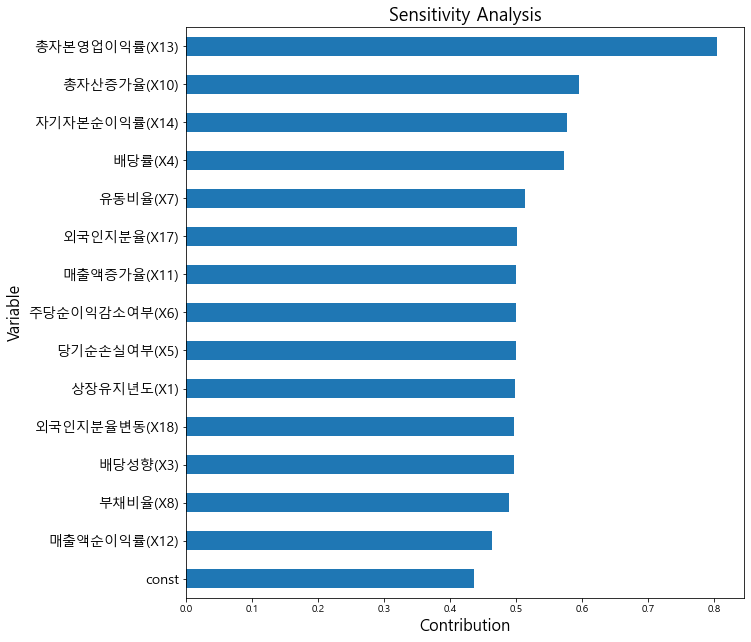

,idx,task,x,contribution_x
총자본영업이익률(X13),0,LogitReg,19.240,0.804905
총자산증가율(X10),0,LogitReg,18.170,0.595119
자기자본순이익률(X14),0,LogitReg,24.210,0.577453
배당률(X4),0,LogitReg,90.000,0.572834
유동비율(X7),0,LogitReg,384.310,0.513017
외국인지분율(X17),0,LogitReg,0.990,0.500734
매출액증가율(X11),0,LogitReg,-0.880,0.500112
당기순손실여부(X5),0,LogitReg,0.000,0.500000
주당순이익감소여부(X6),0,LogitReg,0.000,0.500000
상장유지년도(X1),0,LogitReg,5.000,0.497724


In [29]:
# UDF for contribution(sensitivity) analysis per each variables
# task: "LogitReg"

def sensitivity_analysis_LinearReg_LogitReg(task, model, X, idx, bar_plot_yn):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    pd.options.mode.chained_assignment = None

    # get one object's X values
    X_i = X.iloc[idx, :]

    # make a matrix with zeros with shape of [num_cols, num_cols]
    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])

    # fil X_mat with values from one by one columns, leaving the ohters zeros
    for i, j in enumerate(X_i):

        X_mat[i, i] = j

    # data frame with contribution of each X columns in descending order
    sensitivity_df = pd.DataFrame({

        'idx': idx
        , 'task': task
        , 'x': X_i
        , 'contribution_x': model.predict(X_mat)})

    sensitivity_df = sensitivity_df.sort_values(by='contribution_x', ascending=True)

    

    # if bar_plot_yn == True then display it

    col_n = X_i.shape[0]

    if bar_plot_yn == True:

        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 0.7*col_n))

        plt.title('Sensitivity Analysis', fontsize=18)

        plt.xlabel('Contribution', fontsize=16)

        plt.ylabel('Variable', fontsize=16)

        plt.yticks(fontsize=14)

        plt.show()

    return sensitivity_df.sort_values(by='contribution_x', ascending=False)


# apply sensitivity analysis function on 1st observation for Logistic Regression

sensitivity_analysis_LinearReg_LogitReg(task="LogitReg"
                                        , model=model
                                        , X=test_x
                                        , idx=0
                                        , bar_plot_yn=True)

In [30]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [44]:
# auc점수 구하기
print(roc_auc_score(test_y, model.predict(test_x)))

0.7134677049931286


---